Problem 1

Wholesale Customers Analysis 

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=1)

In [2]:
wholesale = pd.read_csv('Wholesale Customer.csv')
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Question 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?


Use methods of descriptive statistics to summarize data:-

In [3]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
wholesale.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [170]:
wholesale.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
wholesale.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
wholesale.shape

(440, 9)

In [8]:
wholesale.isnull().any().any()

False

In [9]:
wholesale.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
wholesale.groupby(['Region','Channel']).sum()

Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Region Channel                                                     
Lisbon Hotel            14026   761233   228342   237542  184512   
       Retail            4069    93600   194112   332495   46514   
Oporto Hotel             8988   326215    64519   123074  160861   
       Retail            5911   138506   174625   310200   29271   
Other  Hotel            48020  2928269   735753   820101  771606   
       Retail           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen  
Region Channel                                  
Lisbon Hotel               56081         70632  
       Retail             148055         33695  
Oporto Hotel               13516         30965  
       Retail             159795         23541  
Other  Hotel              165990        320358  
       Retail             724420        191752

In [11]:
sale_regionwise = wholesale.groupby('Region').sum()
#sale_regionwise.drop('Buyer/Spender', inplace=True, axis=1)
sale_regionwise

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [16]:
sale_regionwise.T.sum().sort_values(ascending=False)

Region
Other     10741625
Lisbon     2404908
Oporto     1569987
dtype: int64

In [17]:
print('The  customers spent in other region is more compared to Lisbon & Oporto')
print('Other : %1.2f\n' %sale_regionwise.T.sum().sort_values(ascending=False).iloc[0] )
print('The  customers spent in Oporto region is least compared to Lisbon & Oporto')
print('Oporto : %1.2f\n' %sale_regionwise.T.sum().sort_values(ascending=False).iloc[-1] )

The  customers spent in other region is more compared to Lisbon & Oporto
Other : 10741625.00

The  customers spent in Oporto region is least compared to Lisbon & Oporto
Oporto : 1569987.00



Text(0, 0.5, ' The Total Spending in Region')

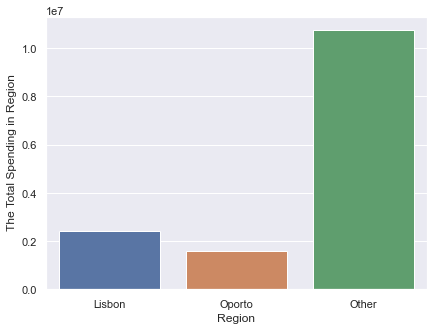

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data= sale_regionwise.T, estimator=sum, ci=None)
plt.xlabel('Region')
plt.ylabel(' The Total Spending in Region')

In [19]:
sale_channelwise = wholesale.groupby('Channel').sum()
#sale_channelwise.drop('Buyer/Spender', inplace=True, axis=1)
sale_channelwise

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [20]:
sale_channelwise.T.sum().sort_values(ascending=False)

Channel
Hotel     8070603
Retail    6645917
dtype: int64

In [169]:
print('The Hotel Channel spent more compared to retail Channel.\nHotel : %1.2f' %sale_channelwise.T.sum().sort_values(ascending=False).iloc[0] )
print('The Retail Channel spent the least : \nRetail : %1.2f'%sale_channelwise.T.sum().sort_values(ascending=False).iloc[1])

The Hotel Channel spent more compared to retail Channel.
Hotel : 8070603.00
The Retail Channel spent the least : 
Retail : 6645917.00


Text(0, 0.5, ' The Total Spending in Channel')

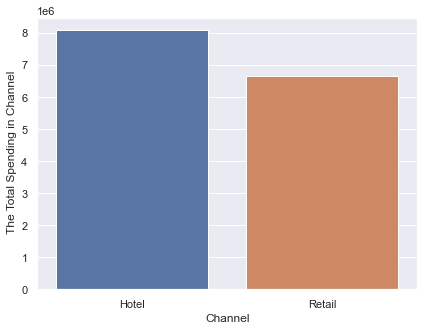

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data= sale_channelwise.T, estimator=sum, ci=None)
plt.xlabel('Channel')
plt.ylabel(' The Total Spending in Channel')

 From the both Region & Channel bargraphs, we can conclude that:
 
    -->The Region 'Others' spent most in the Region
    
    --> The region 'Oporto' is the least spent in the region.
    
    --> The channel 'Hotel' spent most than Retail
    

Text(0, 0.5, 'Total Spent in Channel')

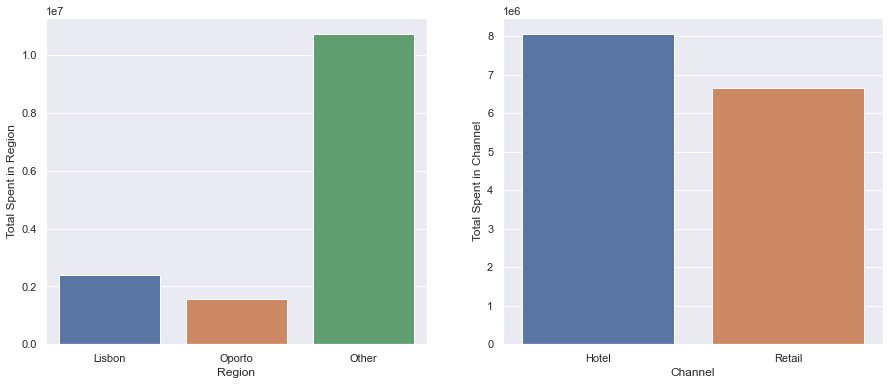

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data= sale_regionwise.T, estimator=sum, ci=None)
plt.xlabel('Region')
plt.ylabel('Total Spent in Region')

plt.subplot(1,2,2)
sns.barplot(data= sale_channelwise.T, estimator=sum, ci=None)
plt.xlabel('Channel')
plt.ylabel('Total Spent in Channel')

## Question1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel ? Provide a detailed justification for your answer.What is the best check for 'Behaviour' and what doesbehavior indicate?


Behavior generally talks about minimum, maximum, IQR, the spread of the variable, etc. Which can be concluded from  describe()function

wholesale.describe()

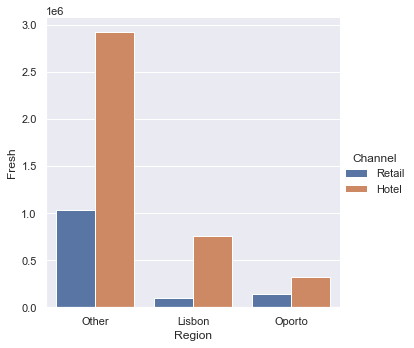

In [24]:
sns.catplot(data=wholesale, x='Region',y='Fresh',kind='bar',estimator =sum,hue = 'Channel',ci= False)

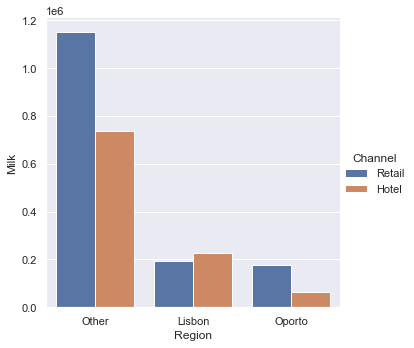

In [25]:
sns.catplot(data=wholesale, x='Region',y='Milk',kind='bar',estimator =sum,hue = 'Channel',ci= False)

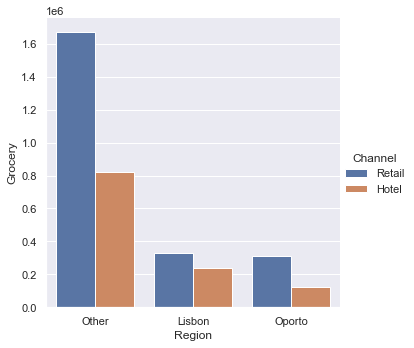

In [26]:
sns.catplot(data=wholesale, x='Region',y='Grocery',kind='bar',estimator =sum,hue = 'Channel',ci= False)

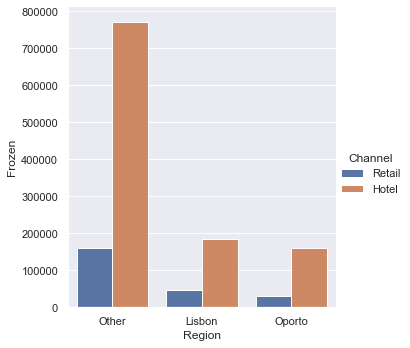

In [28]:
sns.catplot(data=wholesale, x='Region',y='Frozen',kind='bar',estimator =sum,hue = 'Channel',ci= False)

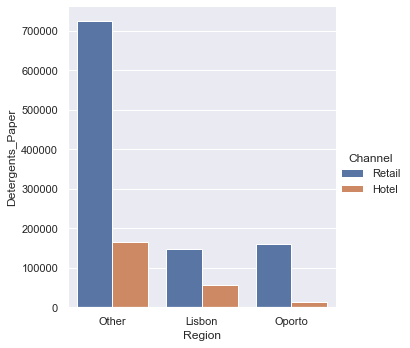

In [29]:
sns.catplot(data=wholesale, x='Region',y='Detergents_Paper',kind='bar',estimator =sum,hue = 'Channel',ci= False)

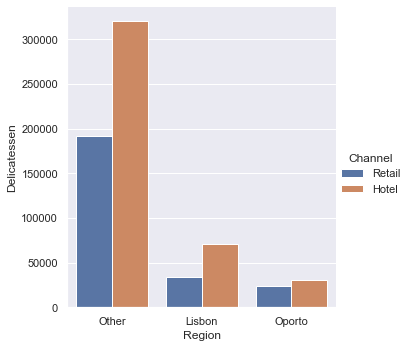

In [180]:
sns.catplot(data=wholesale, x='Region',y='Delicatessen',kind='bar',estimator =sum,hue = 'Channel',ci= False)

## Question 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behavior?

In [32]:
wholesale.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

Fresh item have highest Standard deviation So that is Inconsistent.

Delicatessen item have smallest Standard deviation, So that is consistent.

In [174]:
cv_Fresh = np.std(wholesale['Fresh']) / np.mean(wholesale['Fresh'])
cv_Fresh

1.0527196084948245

In [175]:
cv_Milk = np.std(wholesale['Milk']) / np.mean(wholesale['Milk'])
cv_Milk

1.2718508307424503

In [176]:
cv_Grocery = np.std(wholesale['Grocery']) / np.mean(wholesale['Grocery'])
cv_Grocery

1.193815447749267

In [178]:
cv_Frozen = np.std(wholesale['Frozen']) / np.mean(wholesale['Frozen'])
cv_Frozen

1.5785355298607762

In [179]:
cv_Detergents_Paper = np.std(wholesale['Detergents_Paper']) / np.mean(wholesale['Detergents_Paper'])
cv_Detergents_Paper

1.6527657881041729

In [184]:
cv_Delicatessen = np.std(wholesale['Delicatessen']) / np.mean(wholesale['Delicatessen'])
cv_Delicatessen

1.8473041039189306

In [171]:
wholesale.select_dtypes(exclude='object').sum().drop('Buyer/Spender', axis=0).sort_values(ascending=False)


Fresh               5280131
Grocery             3498562
Milk                2550357
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [34]:
wholesale.groupby('Region').describe().drop('Buyer/Spender', axis=1)

Fresh                                                              \
        count          mean           std   min      25%     50%      75%   
Region                                                                      
Lisbon   77.0  11101.727273  11557.438575  18.0  2806.00  7363.0  15218.0   
Oporto   47.0   9887.680851   8387.899211   3.0  2751.50  8090.0  14925.5   
Other   316.0  12533.471519  13389.213115   3.0  3350.75  8752.5  17406.5   

                   Milk               ... Detergents_Paper           \
             max  count         mean  ...              75%      max   
Region                                ...                             
Lisbon   56083.0   77.0  5486.415584  ...          3593.00  19410.0   
Oporto   32717.0   47.0  5088.170213  ...          4324.50  38102.0   
Other   112151.0  316.0  5977.085443  ...          3875.75  40827.0   

       Delicatessen                                                         \
              count         mean          std   min    25%    50%      75%   
Region                                                                       
Lisbon         77.0  1354.896104  1345.423340   7.0  548.0  806.0  1775.00   
Oporto         47.0  1159.702128  1050.739841  51.0  540.5  898.0  1538.50   
Other         316.0  1620.601266  3232.581660   3.0  402.0  994.0  1832.75   

                 
            max  
Region           
Lisbon   6854.0  
Oporto   5609.0  
Other   47943.0  

[3 rows x 48 columns]

In [35]:
round(sale_regionwise.describe(),2)


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,32340.00,1760043.67,850119.00,1166187.33,450550.00,422619.00,223647.67
std,27487.37,1915674.05,904146.24,1153032.39,416144.59,405411.96,251054.62
min,14899.00,464721.00,239144.00,433274.00,190132.00,173311.00,54506.00
25%,16497.00,659777.00,330799.00,501655.50,210579.00,188723.50,79416.50
50%,18095.00,854833.00,422454.00,570037.00,231026.00,204136.00,104327.00
75%,41060.50,2407705.00,1155606.50,1532644.00,580759.00,547273.00,308218.50
max,64026.00,3960577.00,1888759.00,2495251.00,930492.00,890410.00,512110.00


In [36]:
wholesale.describe().drop('Buyer/Spender', axis=1)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


It talks about the descriptive measures of variability like IQR, Standarddeviation, CoefficientofVariance,etc.

Expectation:
    
Inconsistency here means variability.

Least inconsistent means less varying and most inconsistent means high variation.

So find which item is varying high/low in terms ofprice/quantity.

In [182]:
#std, iqr, range, skewness, cv , select plot with your discretion


In [183]:
wholesale.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [39]:
wholesale.std().sort_values(ascending=True)

Buyer/Spender         127.161315
Delicatessen         2820.105937
Detergents_Paper     4767.854448
Frozen               4854.673333
Milk                 7380.377175
Grocery              9503.162829
Fresh               12647.328865
dtype: float64

In [40]:
wholesale.var().sort_values(ascending=True)

Buyer/Spender       1.617000e+04
Delicatessen        7.952997e+06
Detergents_Paper    2.273244e+07
Frozen              2.356785e+07
Milk                5.446997e+07
Grocery             9.031010e+07
Fresh               1.599549e+08
dtype: float64

In [42]:
wholesale.skew().sort_values(ascending=True)


Buyer/Spender        0.000000
Fresh                2.561323
Grocery              3.587429
Detergents_Paper     3.631851
Milk                 4.053755
Frozen               5.907986
Delicatessen        11.151586
dtype: float64

The least skewed is least consistent

In [43]:
# coefficent of variation
cv = wholesale.std()/wholesale.mean()
cv.sort_values(ascending=True).drop('Buyer/Spender', axis=0)

Fresh               1.053918
Grocery             1.195174
Milk                1.273299
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

In [44]:
#Inter Quartile Range
IQR = wholesale.quantile(.75) - wholesale.quantile(.25)
IQR.sort_values(ascending=True).drop('Buyer/Spender', axis=0)

Delicatessen         1412.00
Frozen               2812.00
Detergents_Paper     3665.25
Milk                 5657.25
Grocery              8502.75
Fresh               13806.00
dtype: float64

In [45]:
upper_outliers = wholesale.quantile(.75)+ 1.5*(IQR)
lower_outliers = wholesale.quantile(.25)- 1.5*(IQR)
print(upper_outliers)
print('\n')
print(lower_outliers)

Buyer/Spender         659.500
Fresh               37642.750
Milk                15676.125
Grocery             23409.875
Frozen               7772.250
Detergents_Paper     9419.875
Delicatessen         3938.250
dtype: float64


Buyer/Spender        -218.500
Fresh              -17581.250
Milk                -6952.875
Grocery            -10601.125
Frozen              -3475.750
Detergents_Paper    -5241.125
Delicatessen        -1709.750
dtype: float64


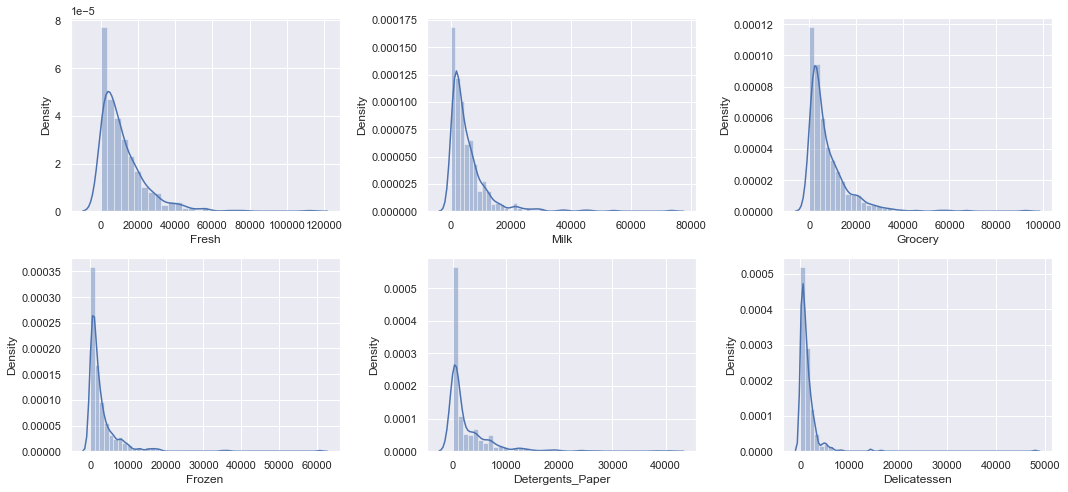

In [190]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,7))
for i in np.arange(len(wholesale.iloc[:,3:].columns)):
    plt.subplot(2,3,i+1)
    sns.distplot(wholesale.iloc[:,3:].iloc[:,i])
    plt.xlabel(wholesale.iloc[:,3:].columns[i])
    plt.ylabel(ylabel= 'Density')
    plt.tight_layout()
    plt.savefig("Variance Plot")

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.


<AxesSubplot:>

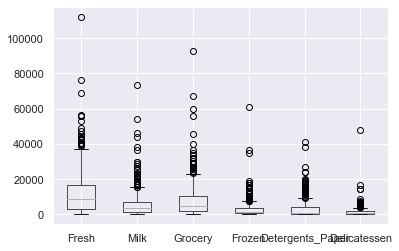

In [186]:
wholesale.drop(['Buyer/Spender', 'Channel', 'Region'], axis=1).boxplot()

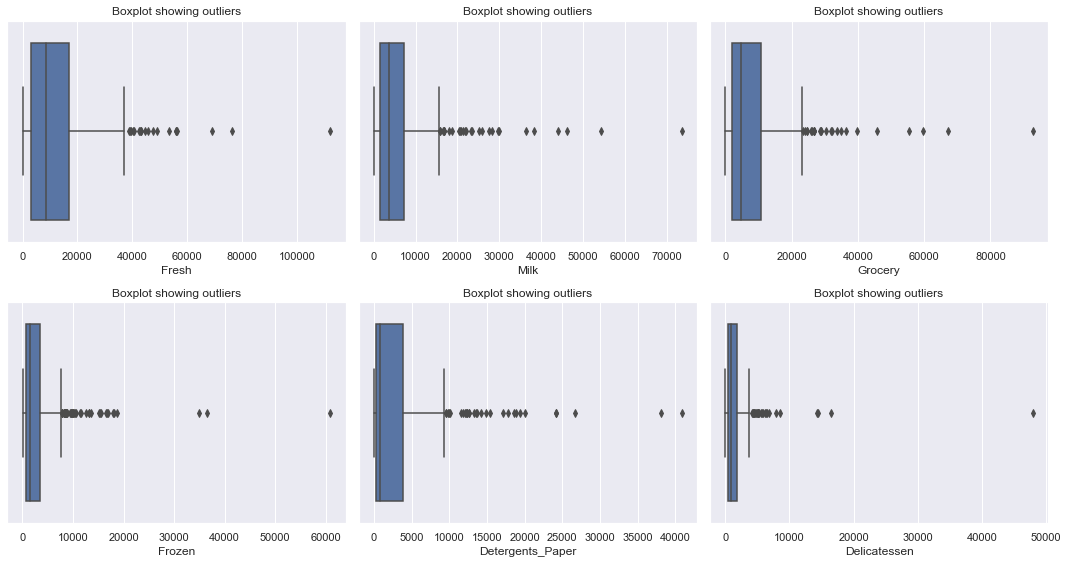

In [191]:
wholesale.iloc[:,3:]
plt.figure(figsize=(15,8))
for i in np.arange(len(wholesale.iloc[:,3:].columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data = wholesale.iloc[:,3:], x = wholesale.iloc[:,3:].columns[i])
    plt.title("Boxplot showing outliers")
    plt.tight_layout()
    plt.savefig("Boxplot")

In [192]:
upper_outliers.drop('Buyer/Spender', axis=0)


Fresh               37642.750
Milk                15676.125
Grocery             23409.875
Frozen               7772.250
Detergents_Paper     9419.875
Delicatessen         3938.250
dtype: float64

In [50]:
lower_outliers.drop('Buyer/Spender', axis=0)

Fresh              -17581.250
Milk                -6952.875
Grocery            -10601.125
Frozen              -3475.750
Detergents_Paper    -5241.125
Delicatessen        -1709.750
dtype: float64

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

You can put it in your ownwords.Insights can lead to recommendations.Frame in a way that can help business.

The expectation is to state insights and recommendations on the basis of analysis/output/conclusions derived 
as partof other questions in this problem statement. 
What does the report mean here?
Whatever EDA/analysis you have done on the wholesale customer analysis data 
you have to share your findings and business insights.
That is the only recommendation it talks about which is based on all these steps you have done for that data.

In [58]:
wholesale_corr = wholesale.drop("Buyer/Spender", axis=1).corr()
wholesale_corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [59]:
wholesale_corr.style.background_gradient(cmap='viridis').set_precision(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicatessen,0.24,0.41,0.21,0.39,0.07,1.00


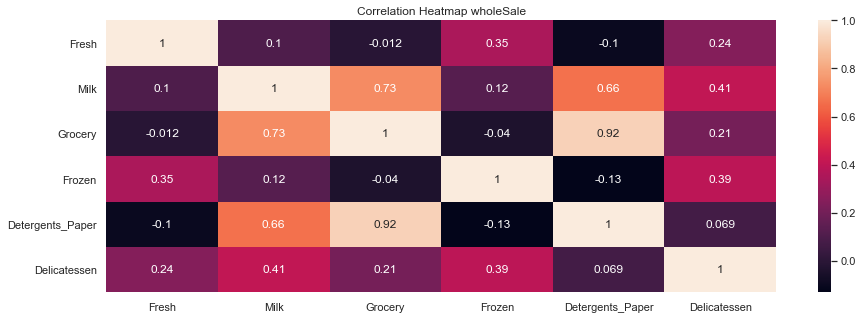

In [193]:
plt.figure(figsize=(15,5))
sns.heatmap(wholesale_corr, annot=True)
plt.title("Correlation Heatmap wholeSale")
plt.savefig("Correlation plot")

Problem 2 -

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.


In [194]:
survey = pd.read_csv('Survey-1.csv')
survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [195]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [63]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [64]:
survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


 ## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [65]:
survey_gender_major = pd.crosstab(index=survey.Gender, columns= survey.Major, margins=True)
survey_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [66]:
survey_gender_gradintention = pd.crosstab(index=survey.Gender, columns= survey['Grad Intention'], margins=True)
survey_gender_gradintention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [67]:
survey_gender_employment = pd.crosstab(index=survey.Gender, columns= survey.Employment, margins=True)
survey_gender_employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [68]:
survey_gender_computer = pd.crosstab(index=survey.Gender, columns= survey.Computer, margins=True)
survey_gender_computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [69]:
survey_gender_employment # we can take any contigency table created to get the probability that a randomly selected student is male/female.

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [70]:
survey['Gender'].value_counts(normalize=True)

Female    0.532258
Male      0.467742
Name: Gender, dtype: float64

 2.2.1. What is the probability that a randomly selected CMSU student will be male?


In [72]:
probability_male = survey_gender_employment.loc["Male", 'All']/survey_gender_employment.loc['All','All']
print('Probability that a randomly selected CMSU student is a male : %1.4f' %probability_male)

Probability that a randomly selected CMSU student is a male : 0.4677


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [73]:
probability_female = survey_gender_employment.loc["Female", 'All']/survey_gender_employment.loc['All','All']
print('Probability that a randomly selected CMSU student is a female : %1.4f' %probability_female)

Probability that a randomly selected CMSU student is a female : 0.5323


In [74]:
survey_gender_computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [75]:
probability_male = survey_gender_computer.loc["Male", 'All']/survey_gender_computer.loc['All','All']
probability_female = survey_gender_computer.loc["Female", 'All']/survey_gender_computer.loc['All','All']
print('Probability that a randomly selected CMSU student is a male : %1.4f' %probability_male, '\nProbability that a randomly selected CMSU student is a female is : %1.4f' %probability_female)

Probability that a randomly selected CMSU student is a male : 0.4677 
Probability that a randomly selected CMSU student is a female is : 0.5323


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [76]:
survey_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [77]:
conditional_probability_major = pd.DataFrame(columns=survey_gender_major.columns).drop("All", axis=1)
conditional_probability_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided


In [78]:
survey_gender_major.loc[['Male']]/survey_gender_major.loc['Male', "All"]

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448,1.0


2.3.1. Find the conditional probability of different majors among the male students in CMSU.


In [80]:
conditional_probability_major.loc['Majors Male'] = survey_gender_major.loc['Male']/survey_gender_major.loc['Male', "All"]
conditional_probability_major.reset_index(inplace=False).set_index('index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
index,,,,,,,,
Majors Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [81]:
conditional_probability_major.loc['Majors Female'] = survey_gender_major.loc['Female']/survey_gender_major.loc['Female', "All"]
conditional_probability_major.reset_index(inplace=False).set_index('index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
index,,,,,,,,
Majors Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
Majors Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [82]:
survey_gender_gradintention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

Probability(male and graduate intends) = Probability( male intersection graduate intends) = probability(male) * Probability(graduate intends|male)

In [83]:
prob_male_grad_intends =17/29
prob_grad_and_male = prob_male_grad_intends * probability_male
print('Probability that a randomly choosen student is male andintends to graduate is : %1.4f' %prob_grad_and_male)

Probability that a randomly choosen student is male andintends to graduate is : 0.2742


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

Probability(female and does not have a laptop) = Probability(no laptop|female) * Probability(female)

In [84]:
survey_gender_computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [85]:
prob_female_nolaptop=(33-29)/33
prob_female_and_nolaptop = prob_female_nolaptop * probability_female #33/62*4/33
print('Probability that  a randomly selected student is a female and does not has a laptop is : %1.4f' %prob_female_and_nolaptop)

Probability that  a randomly selected student is a female and does not has a laptop is : 0.0645


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [86]:
survey_gender_employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

P(male or full-time employment) = P(male) + P(full time employment) - P(male and full time employment)


In [87]:
prob_fulltime_emp         = 10/62
prob_male_and_fulltime_emp = 7/62
prob_male_or_fulltime_emp  = probability_male + prob_fulltime_emp - prob_male_and_fulltime_emp
print('Probability that a randomly selected student is either a male or has a full-time employment is : %1.4f' %prob_male_or_fulltime_emp)

Probability that a randomly selected student is either a male or has a full-time employment is : 0.5161


2.5.2. Find the conditional probability that given a female student is randomly chosen,
she is majoring in international business or management.

P(international business or management in female) = P(international business| female or management|female) 
           = P(international businees|female) + prob(management|female) - prob(international business| female and     management|female) 

The prob(international|girl and management|female)=0 

Because international business and management are mutually excllusive events.

In [88]:
prob_intrbus_female = 4/33
prob_mngmt_female = 4/33
prob_intrbus_or_mngmt_female = prob_intrbus_female + prob_mngmt_female

print('Probability that given a female student is randomly choosen,\nshe is majoring in international business or management is: %1.4f' %prob_intrbus_or_mngmt_female)

Probability that given a female student is randomly choosen,
she is majoring in international business or management is: 0.2424


 ## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [89]:
survey_gender_gradintention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [90]:
df = survey_gender_gradintention.drop('All').drop(['All','Undecided'], axis=1)
df

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


Do you think graduate intention and being female are independent events?

For Being Independent,

P(Female and graduate intent)= P(Female intersection graduate intent) = P(Female)*P(graduate intent|Female), 

For Being independent,
P(Female and graduate intent) = P(Female)*P(graduate intent)

to test whether it is dependent or independent we have,

if P(graduate) = P(graduate intent|Female) # Independent

if P(graduate) != P(graduate intent|Female) # Not independent

In [91]:
prob_graduate_intent                   = 28/40
prob_Female                        = 20/40
prob_Female_graduate_intent      = 11/28


In [92]:
prob_grad_intent_and_Female_notind = prob_graduate_intent * prob_Female_graduate_intent # if not independent
prob_grad_intent_and_Female_ind = prob_graduate_intent * prob_Female                   #if independent

if prob_grad_intent_and_Female_notind == prob_grad_intent_and_Female_ind:
    print('Graduate intention and being female are Independent events.')
else:
    print('\nGraduate intention and being female are Not Independent events.\n')


Graduate intention and being female are Not Independent events.



# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [106]:
sample = survey.copy()
sample.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [196]:
from scipy.stats import norm

In [ ]:
for i in np.arange(len(sample.columns)):
    a     = sample.iloc[:,i]
    one   = norm.cdf(a.std(),a.mean(),a.std())-norm.cdf(-1*a.std(),a.mean(),a.std())
    two   = norm.cdf(2*a.std(),a.mean(),a.std())-norm.cdf(-2*a.std(),a.mean(),a.std())
    three = norm.cdf(3*a.std(),a.mean(),a.std())-norm.cdf(-3*a.std(),a.mean(),a.std())
    print(sample.columns[i],":", 'one : {},  two : {},  three : {} \n'.format(one,two,three))

In [107]:
sample['GPA_Interval'] = pd.cut(sample['GPA'],[0,2.99,5], labels=['Less than 3', 'More than 3'])
sample


,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Interval
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,Less than 3
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,More than 3
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,Less than 3
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,Less than 3
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Less than 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10,Less than 3
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250,Less than 3
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500,Less than 3
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50,More than 3


In [111]:
sample.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,GPA_Interval
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,Less than 3
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,More than 3
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,Less than 3
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,Less than 3
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Less than 3


In [113]:
sample_crosstab = pd.crosstab(index=sample.Gender, columns=sample.GPA_Interval, margins=True)
sample_crosstab

GPA_Interval,Less than 3,More than 3,All
Gender,,,
Female,8,25,33
Male,9,20,29
All,17,45,62


In [114]:
prob_GPA_less_than_3 = 17/62
print('Probability that a randomly selected student has GPA less than 3 is : %1.4f'%prob_GPA_less_than_3)

Probability that a randomly selected student has GPA less than 3 is : 0.2742


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [117]:
sample_earning = survey.copy()

In [118]:
sample_earning['Salary_interval'] = pd.cut(sample_earning.Salary, [0,49.99,100], labels=['Salary < 50', 'Salary >= 50']) 

In [119]:
sample_earning

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,Salary_interval
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,Salary >= 50
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,Salary < 50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,Salary < 50
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,Salary < 50
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Salary < 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10,Salary < 50
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250,Salary < 50
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500,Salary >= 50
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50,Salary < 50


In [120]:
sample_earning.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages,Salary_interval
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200,Salary >= 50
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50,Salary < 50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200,Salary < 50
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250,Salary < 50
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100,Salary < 50


In [121]:
sample_earning_crosstab = pd.crosstab(index=sample_earning.Gender, columns= sample_earning.Salary_interval, margins=True)
sample_earning_crosstab

Salary_interval,Salary < 50,Salary >= 50,All
Gender,,,
Female,15,18,33
Male,15,14,29
All,30,32,62


In [123]:
prob_male_earning_50ormore = 14/29
prob_female_earning_50ormore = 18/33
print('Conditional probability that a randomly selected male is earning 50 or more is : %1.4f\n' %prob_male_earning_50ormore)
print('Conditional probability that a randomly selected female is earning 50 or more is : %1.4f' %prob_female_earning_50ormore)

Conditional probability that a randomly selected male is earning 50 or more is : 0.4828

Conditional probability that a randomly selected female is earning 50 or more is : 0.5455


 # 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

Along with visual representation, you can calculate mean, median, and mode and test the empirical rule for the conclusion. Do we have to identify the results using a Histogram and Boxplot or any other method? A histogram would work. But conclude properly for each of the variables.

In [203]:
sample_normal= survey[['GPA', 'Salary', 'Spending', 'Text Messages']].copy()
sample_normal

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [204]:
sample_normal['Spending'].mean()

482.01612903225805

In [205]:
sample_normal['Spending'].median()

500.0

In [206]:
sample_normal['Spending'].mode()

0    500
dtype: int64

In [136]:
from scipy.stats import norm

In [200]:
for i in np.arange(len(sample_normal.columns)):
    a     = sample_normal.iloc[:,i]
    one   = norm.cdf(a.std(),a.mean(),a.std())-norm.cdf(-1*a.std(),a.mean(),a.std())
    two   = norm.cdf(2*a.std(),a.mean(),a.std())-norm.cdf(-2*a.std(),a.mean(),a.std())
    three = norm.cdf(3*a.std(),a.mean(),a.std())-norm.cdf(-3*a.std(),a.mean(),a.std())
    print(sample_normal.columns[i],":", 'one : {},  two : {},  three : {} \n'.format(one,two,three))

GPA : one : 1.535136899223123e-13,  two : 1.574309499450188e-10,  three : 6.073212543471892e-08 

Salary : one : 0.0012694561037220019,  two : 0.02176426142987045,  three : 0.15419579828311436 

Spending : one : 0.11990186179634363,  two : 0.43182325700800617,  three : 0.7962507832658152 

Text Messages : one : 0.4253099287111714,  two : 0.8020674520303264,  three : 0.9679693937041166 

Age : one : 2.1567560567378496e-43,  two : 1.3360396776783198e-37,  three : 3.0628345029010914e-32 



<AxesSubplot:xlabel='GPA'>

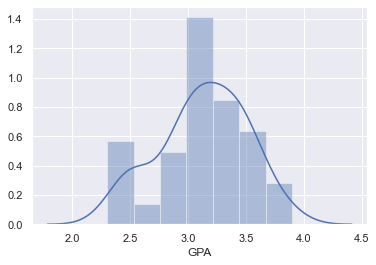

In [209]:
sns.distplot(survey['GPA'])
#sns.distplot(survey['Salary'])
#sns.distplot(survey['Spending'])
#sns.distplot(survey['Text Messages'])

<AxesSubplot:xlabel='Salary'>

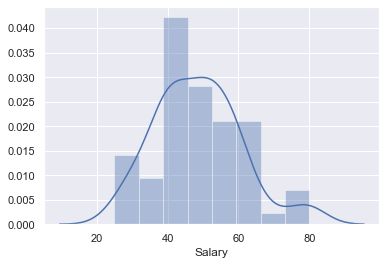

In [210]:
sns.distplot(survey['Salary'])


<AxesSubplot:xlabel='Spending'>

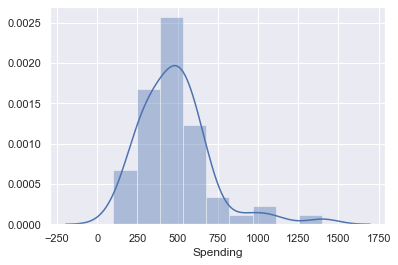

In [211]:
sns.distplot(survey['Spending'])


<AxesSubplot:xlabel='Text Messages'>

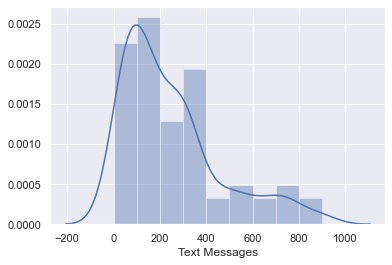

In [212]:
sns.distplot(survey['Text Messages'])

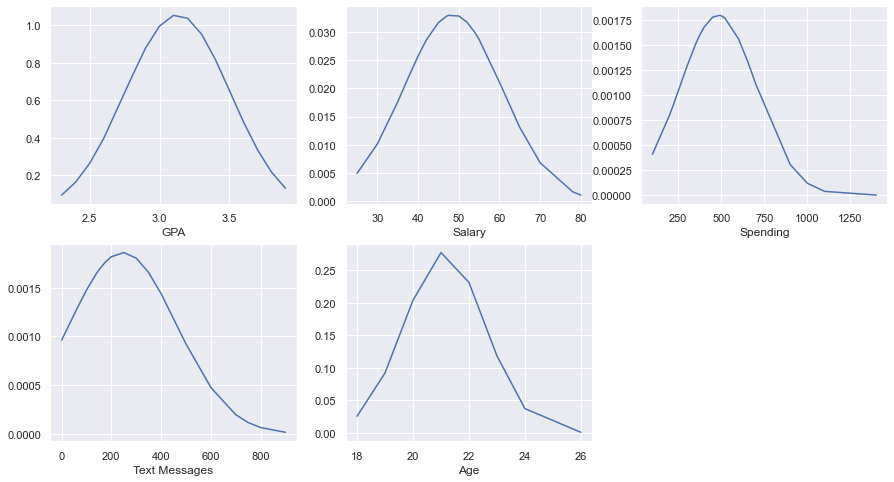

In [202]:
plt.figure(figsize=(15,8))
for i in np.arange(len(sample_normal.columns)):
    
    plt.subplot(2,3,i+1)
    a     = sample_normal.iloc[:,i].sort_values(ascending=True)
    x     = norm.pdf(a,a.mean(), a.std())
    plt.plot(a,x)
    plt.xlabel(sample_normal.columns[i])

Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [2]:
shingles = pd.read_csv('A & B shingles.csv')
shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [3]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet, it is actually looking at whether the moisture content is still greater than 0.35 pounds per 100 square feet. Hence, for every moisture test, the claim to check here becomes whether the moisture content is still greater than 0.35 pounds per 100 square feet.

Alternative hypothesis (HA) : mean moisture content > 0.35 
Null hypothesis(H0) : mean moisture content <= 0.35

For A shingles, the null and alternative hypothesis to test whether the population mean moisture content is < 0.35 pound per 100 square feet is given:

H0 : mean moisture content <=0.35 HA : mean moisture content > 0.35

For B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

H0 : mean moisture content <=0.35 HA : mean moisture content > 0.35

The null hypothesis is the current status or status quo. The company's current status is that the mean moisture content is less than 0.35. Their current status quo needs to be refuted on the basis of very strong evidence. The company does this test on the basis of the assumption that their production process is under control. That is hinted as To monitor the amount of moisture present, the company conducts moisture tests

Hence H0: mean moisture content =< 0.35 (since it is current claim) Ha: mean moisture content > 0.35. The company is monitoring its quality control

This is a peculiar case of claim and status quo being the same i.e. Ho <= 0.35 while the test is carried out is to test for the opposite i.e. Ha > 0.35




In [147]:
Ho: mu<=0.35
Ha: mu> 0.35

In [4]:
t_stats_A, p_value_A = stats.ttest_1samp(shingles.A, 0.35,alternative='greater')


In [5]:
t_stats_A

-1.4735046253382782

In [151]:
1-p_value_A

0.07477633144907514

In [152]:
p_value_A/2

0.46261183427546243

In [153]:
t_stats_B, p_value_B = stats.ttest_1samp(shingles.B, 0.35, nan_policy='omit')

In [154]:
t_stats_B

-3.1003313069986995

In [155]:
p_value_B/2

0.0020904774003191826

In [156]:
if p_value_A/2 < 0.05:
    print('FOR SAMPLE A: \n\nWe find much evidence to reject the null hypothesis as the P_value is less than alpha thus we are 95% confident that that average moisture per 100 sq.feet is more than 0.35 pounds for sample A.')
else:
    print('FOR SAMPLE A: \n\nWe do not find enough evidence, as p_value is more than the alpha, thus we fail to reject the null hypothesis and we can say with 95% confidence that the average moisture per 100 sq.feet is less than 0.35 pounds for sample A.\n')

if p_value_B/2 < 0.05:
    print('FOR SAMPLE B: \n\nWe find much evidence to reject the null hypothesis as the P_value is less than alpha thus we reject the null hypothesis, and we are 95% confident that average moisture per 100 sq.feet is more than 0.35 pounds for sample B.')
else:
    print('FOR SAMPLE B: \n\nWe do not find enough evidence, as p_value is more than the alpha, thus we fail to reject the null hypothesis and we can say with 95% confidence that the average moisture per 100 sq.feet is less than 0.35 pounds for sample B.')
    

FOR SAMPLE A: 

We do not find enough evidence, as p_value is more than the alpha, thus we fail to reject the null hypothesis and we can say with 95% confidence that the average moisture per 100 sq.feet is less than 0.35 pounds for sample A.

FOR SAMPLE B: 

We find much evidence to reject the null hypothesis as the P_value is less than alpha thus we reject the null hypothesis, and we are 95% confident that average moisture per 100 sq.feet is more than 0.35 pounds for sample B.


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [ ]:
Ho: muA is equal to muB
Ha: muA is not equal to muB

In [157]:
t_stats, p_value = stats.ttest_ind(shingles.A, shingles.B, nan_policy='omit')

In [158]:
t_stats

1.2896282719661123

In [159]:
p_value

0.2017496571835306

In [160]:
if p_value < 0.05:
    print('We have enough evidence to reject null hypothesis and with 95% confidence level it can be said that mean moisture of sample A is not equal to that of sample B.')
else:
    print('We dont have enough evidence, since p_value is more than 0.05, thus we can conclude with 95% confidence level that mean moisture of sample A is equal to sample B.')
    

We dont have enough evidence, since p_value is more than 0.05, thus we can conclude with 95% confidence level that mean moisture of sample A is equal to sample B.


In [161]:
stats.ttest_ind(shingles.A, shingles.B, nan_policy='omit')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

In [162]:
shingles.A.mean(), shingles.B.mean()

(0.3166666666666666, 0.2735483870967742)

In [163]:
shingles.A.count()

36

In [164]:
8.48/31

0.2735483870967742

In [165]:
xbar =0.2735483870967742
count=31
std= shingles.B.std()
std_error= std/np.sqrt(31)

In [166]:
(xbar-0.35)/std_error

-3.100331306998699

In [167]:
stats.t.cdf(-3.100331306998699, 30)

0.002090477400319187

In [168]:
stats.ttest_1samp(shingles.B, 0.35, nan_policy='omit')

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.004180954800638365)

In [263]:
0.004180954800638365/2

0.0020904774003191826

# THE END!!